# Homework 3: Data visualization

This homework assignment is designed to give you practice manipulating and visualizing data. 

You will need to download the **LexicalData.csv** and **Items.csv** files from the *Homework/lexDat* folder in the class GitHub repository. 

This data is a subset of the [English Lexicon Project database](https://elexicon.wustl.edu/). It provides the reaction times (in milliseconds) of many subjects as they are presented with letter strings and asked to decide, as quickly and as accurately as possible, whether the letter string is a word or not. The **Items.csv** provides characteristics of the words used, namely frequency (how common is this word?) and length (how many letters?). Unlike in the previous homework, there isn't any missing data in the **LexicalData.csv** file. 

*Data courtesy of Balota, D.A., Yap, M.J., Cortese, M.J., Hutchison, K.A., Kessler, B., Loftis, B., Neely, J.H., Nelson, D.L., Simpson, G.B., & Treiman, R. (2007). The English Lexicon Project. Behavior Research Methods, 39, 445-459.*

---
## Loading the Data (1 point)

Use the `setwd` (or `system ("gdown")` if you're working in colab) and `read.csv` functions to load data from the **LexicalData.csv** and **Items.csv** files. Then, as in the previous homework, remove the commas from the reaction times and convert them from strings to numbers. Use `head` to look at the first few rows of each data frame. 

*Note: the `Freq_HAL` variable in **Items.csv** has a similar formatting issue, using string values with commas. We're not going to worry about fixing this since we're only using `Log_Freq_HAL`, which is the natural log transformation of `Freq_HAL`, in this homework.*

In [4]:
#INSERT CODE HERE
data <- read.csv('LexicalData.csv')
data$D_RT <- as.numeric(gsub(",","",data$D_RT))
head(data)
items <- read.csv('Items.csv')
head(items)

,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore
,<int>,<int>,<int>,<dbl>,<fct>,<fct>,<dbl>
1,157,1,1,710,browse,false,-0.437
2,67,1,1,1094,refrigerant,false,0.825
3,120,1,1,587,gaining,false,-0.645
4,21,1,1,984,cheerless,false,0.025
5,236,1,1,577,pattered,false,-0.763
6,236,2,1,715,conjures,false,-0.364


,Occurrences,Word,Length,Freq_HAL,Log_Freq_HAL
,<int>,<fct>,<int>,<fct>,<dbl>
1,1,synergistic,11,284,5.649
2,1,synonymous,10,951,6.858
3,1,syntactical,11,114,4.736
4,1,synthesis,9,"6,742",8.816
5,1,synthesized,11,"2,709",7.904
6,1,synthesizer,11,"1,390",7.237


## Reformatting the Data (1 points)

First you'll need to load the `tidyverse` library.

In [3]:
#INSERT CODE HERE
library(tidyverse)

 In order to get some insights about what characteristics of words make them easier to recognize, it would be useful to have reaction times and word characteristics in the same data frame. Add the `Length` and `Log_Freq_HAL` variables from the items data frame to the reaction times data frame using `left_join()`. You may want to use `select()` and the piping operator `%>%`, as well.

In [17]:
#INSERT CODE HERE
joined_data <- left_join(data,items[,c("Word","Length","Log_Freq_HAL")],by=c("D_Word"="Word"))
head(joined_data)

,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore,Length,Log_Freq_HAL
,<int>,<int>,<int>,<dbl>,<fct>,<fct>,<dbl>,<int>,<dbl>
1,157,1,1,710,browse,false,-0.437,6,8.856
2,67,1,1,1094,refrigerant,false,0.825,11,4.644
3,120,1,1,587,gaining,false,-0.645,7,8.304
4,21,1,1,984,cheerless,false,0.025,9,2.639
5,236,1,1,577,pattered,false,-0.763,8,1.386
6,236,2,1,715,conjures,false,-0.364,8,5.268


## Visualizing the Data (7 points)

Now, let's visualize some aspects of the data. For each of the following questions, use `ggplot2` to plot the data in a way that helps you answer the question. Then write a qualitative response to the question. **Keep in mind the 9 properties of graphical excellence as you make decisions for this section.**

In [92]:
sum(items$Occurrences!=1)

[1] 18286

*Question 1:* How are the reaction time values distributed?

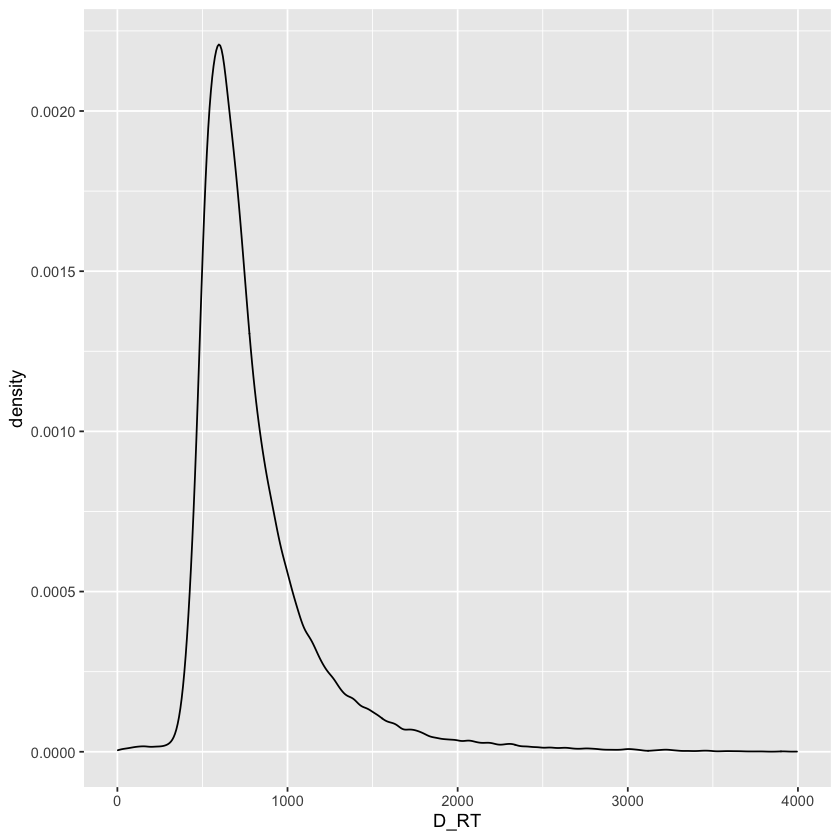

In [28]:
#INSERT CODE HERE
library(ggplot2)

ggplot(joined_data,aes(x=D_RT))+geom_density()

> This density plot shows which D_RT values are more common in our dataset. It seems regardless of other factors, the response times tend to lie in a very narrow range with the most common response time ~600ms. 

*Question 2:* Is there a relationship between word length and log frequency? If so, how would you describe it? 

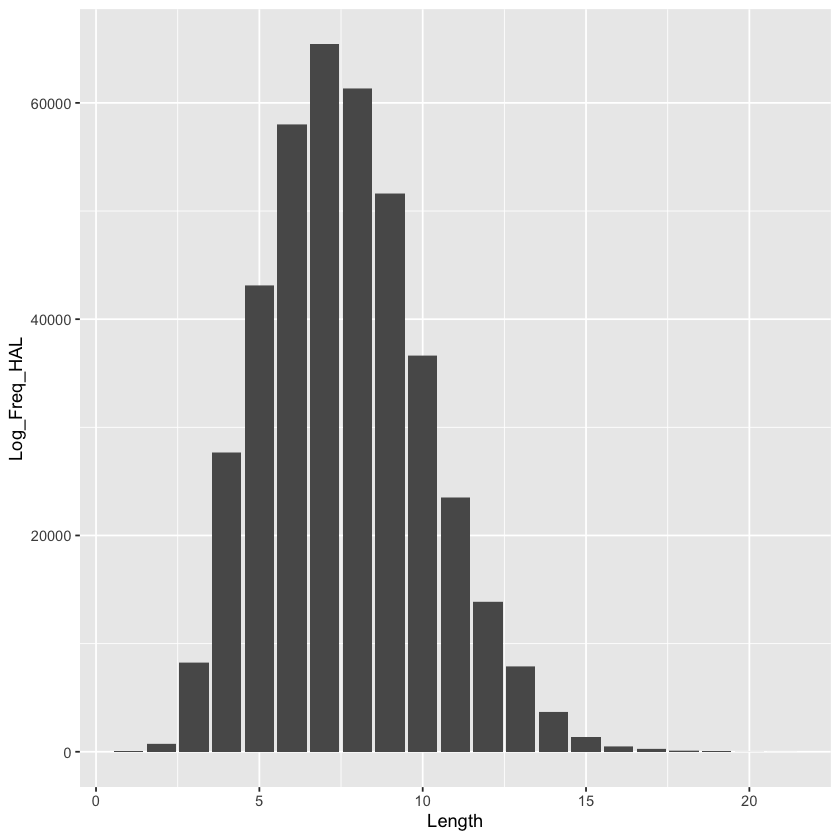

In [27]:
#INSERT CODE HERE
d <- group_by(joined_data, Length) %>% summarize(Average_response_time = mean(Log_Freq_HAL))
ggplot(d, aes(x=Length,y=Average_response_time))+geom_bar(stat="identity")

> This plot shows word length on the x axis and log of the frequency on the y axis. It appears that the distribution of word occurrence is gaussian or normally distributed. That means that average length words are the most common and the very small and very big words are much more rare.


*Question 3:* What is the relationship between log word frequency and lexical decision reaction time? (hint: including `stat_summary` will be helpful)

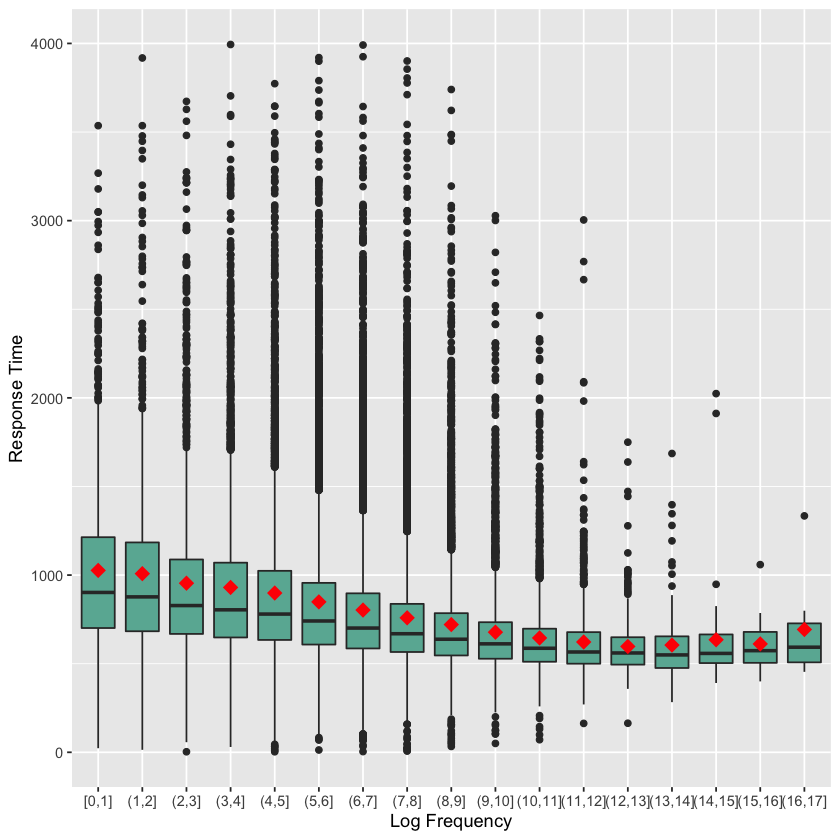

In [83]:
#INSERT CODE HERE

p <- joined_data %>%
  
  # Add a new column called 'bin': cut the initial 'log_freq' in bins
  mutate( bin=cut_width(Log_Freq_HAL, width=1, boundary=0) ) %>%
  
  # plot
  ggplot( aes(x=bin, y=D_RT) ) +
    geom_boxplot(fill="#69b3a2")  +
    xlab("Log Frequency") +ylab("Response Time") +
  stat_summary(fun = mean, 
               geom = "point", 
               shape = 18, 
               size = 4, 
               colour = "red")
p

> Here by making boxplots which plot the average distribution in each bin, we can see a trend that as frequency increases, average response time(red diamonds) drops. This is expected since most frequenct words will be easier to identify than less popular words. 


*Question 4:* Is the overall relationship between log word frequency and lexical decision reaction time different for short words versus long words? (hint: try binning both length and frequency)

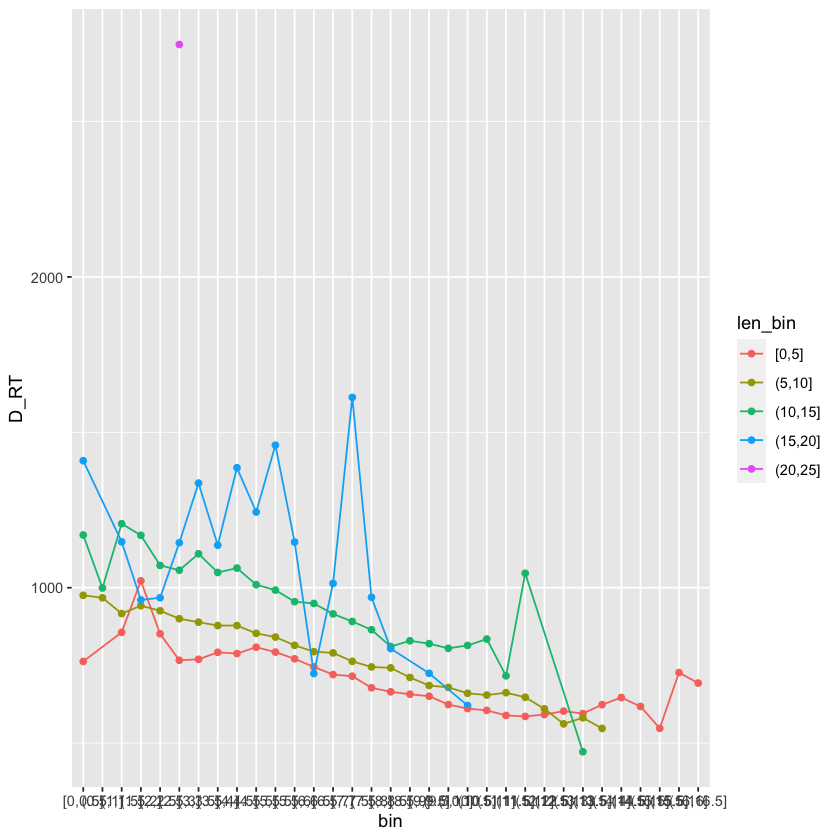

In [86]:
#INSERT CODE HERE
p <- joined_data %>%
  
  # Add a new column called 'bin': cut the initial 'log_freq' in bins
  mutate( bin=cut_width(Log_Freq_HAL, width=0.5, boundary=0) ) %>%
  mutate( len_bin=cut_width(Length, width=5, boundary=0) ) %>%
  # plot
  ggplot( aes(x=bin, y=D_RT,fill=len_bin,color=len_bin) ) +
  stat_summary(geom='point',fun=mean) + 
  stat_summary(geom='line',fun=mean, aes(group=len_bin))
  
p


> Here the x axis bins were made shorter to show a trend, and length based bin averages were added in different colors. So now we can track how response time changes with increasing frequency for each word length bin. 
The trend is same as the previous question(response time decreasing with increasing frequency) for the first 3 bins which include words upto a length of 15. After that we have either too few data points or the trend becomes random.

## Reflection (1 point)
How might you approach analyzing this data differently after the insights you gained from these visualizations? 

> Right now all the data points are marked as non-outliers. I would try to clean the data by trimming the edge cases from the main distribution. All plots abover start misbehaving at very high values and edge cases. 

**DUE:** 5pm EST, March 4, 2021

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*